<a href="https://colab.research.google.com/github/mohameds277/Computer-Vision-/blob/main/Computer_vision_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Faculty of Engineering and Technology**
<br>
**Electrical and Computer Engineering Department**

**ENCS5343 Computer Vision**
<br>
**Assignment 1**
<br>
Mohamed Shqierat 1190702

# Quetsion#1
Look for an image from the internet with the following properties: 8-bit gray-level,
256x256 pixels in size

**1 - Show this image. Don’t use your friends’ ones**

The image used is an image of a house taken by Allen Hanson , the reference of the phtogropher is in the the following link : https://www.researchgate.net/profile/Allen-Hanson-2
<br>
The image is displayed below using skimage library


(<Axes: title={'center': 'Original Image'}>,
 Text(0.5, 1.0, 'Original Image'))

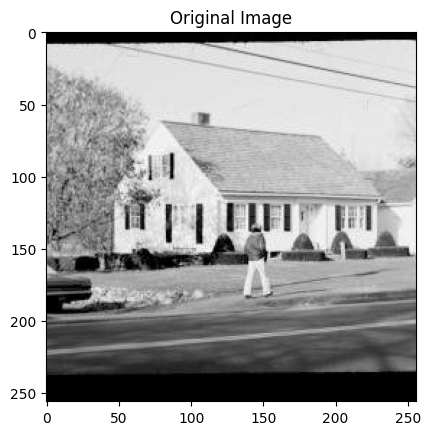

In [49]:
from skimage import io

img = io.imread("gray_scale_image.jpg")
plt.subplot(111), plt.imshow(img, cmap='gray'), plt.title('Original Image')

2- Apply a power law transformation with gamma=0.4 to the image and show
the image after the transformation.

using the numpy and openCV libraries

In [50]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [51]:
img_normalized = img / 255.0

In [52]:
transformed_image = np.power(img_normalized, 0.4)
transformed_image = np.uint8(transformed_image * 255)


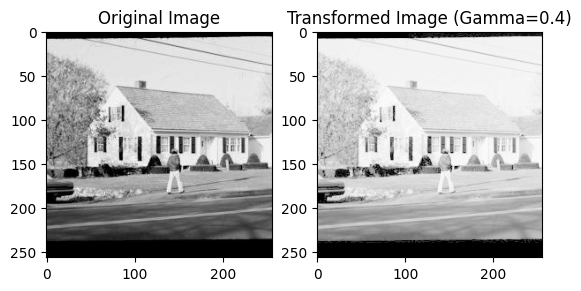

In [53]:
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(transformed_image, cmap='gray'), plt.title('Transformed Image (Gamma=0.4)')
plt.show()

**3 - Add a zero-mean Gaussian noise (with variance =40 gray-levels) to the
original image and show the resulting image**

In [54]:
noise_generator = np.random.normal(0, np.sqrt(4), img.shape).astype(np.uint8)


In [55]:
zero_mean_Gaussian_noise_image = cv2.add(img, noise_generator)

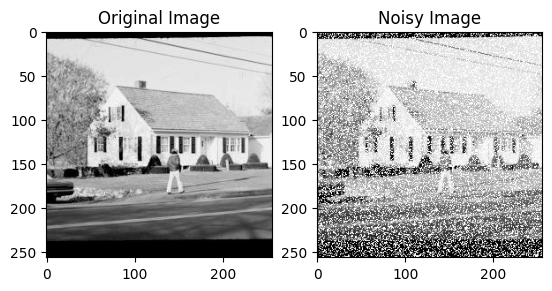

In [56]:
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(zero_mean_Gaussian_noise_image, cmap='gray'), plt.title('Noisy Image')
plt.show()

**5- Apply a 5 by 5 mean filter to the noisy-image you obtained in point 3 above
and show the result. Discuss the results in your report.**

In [57]:
three_points =  [(50, 50), (100, 150), (200, 100)]
filtered_image5x5 = zero_mean_Gaussian_noise_image

In [58]:
for current_point in three_points:
        x, y = current_point
        roi = zero_mean_Gaussian_noise_image[y:y+5, x:x+5]
        mean_value = np.mean(roi)
        filtered_image5x5[y:y+5, x:x+5] = mean_value

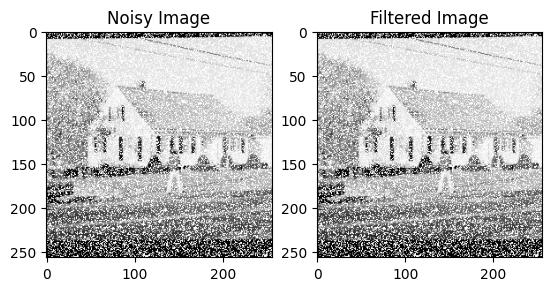

In [59]:
plt.subplot(121), plt.imshow(zero_mean_Gaussian_noise_image, cmap='gray'), plt.title('Noisy Image')
plt.subplot(122), plt.imshow(filtered_image5x5, cmap='gray'), plt.title('Filtered Image')
plt.show()

 5- Add salt and pepper noise (noise-density=0.1) to the original image and then apply a 7 by 7 median filter to the noisy-image and show both images.

in order to to acomplish this proecudre , 2 images shall be generated one applied with salt noise and the other applied with pepper on different randomized coordinates.

In [60]:
salt_pepper_image = img.copy()

In [61]:
salt_coordinates = np.random.randint(0, img.shape[0], int(0.1 * img.size))
pepper_coordinates = np.random.randint(0, img.shape[1], int(0.1 * img.size))


In [62]:
salt_pepper_image[salt_coordinates , pepper_coordinates  ] = 255

In [63]:
salt_pepper_image[salt_coordinates , pepper_coordinates  ] = 0

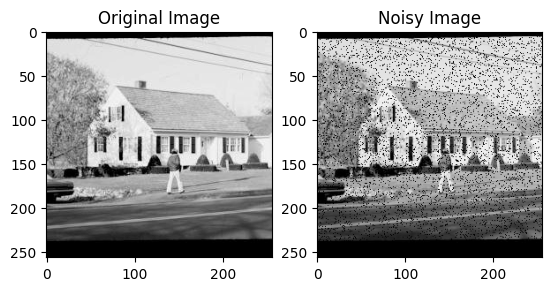

In [64]:
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(salt_pepper_image, cmap='gray'), plt.title('Noisy Image')
plt.show()

6- Apply a 7 by 7 mean filter to the salt and pepper noisy-image and show the result. Discuss the results in your report

In [65]:
salt_pepper_image = cv2.medianBlur(salt_pepper_image, 7)

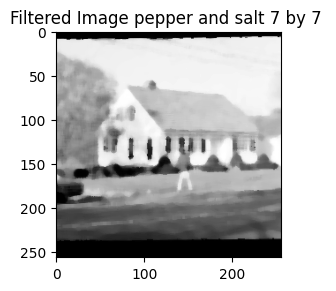

In [66]:

plt.subplot(121), plt.imshow(salt_pepper_image, cmap='gray'), plt.title('Filtered Image pepper and salt 7 by 7 ')
plt.show()

7- Apply a Sobel filter to the original image and show the response (don’t use ready functions to do this part)

In [67]:
# to implement sobel algorthim from scratch , Sobel operators are required to be defined Gx and Gy

G_x = np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])


G_y = np.array([[-1, -2, -1],
                [0, 0, 0],
                [1, 2, 1]])

(<Axes: title={'center': 'sobel filtered'}>,
 Text(0.5, 1.0, 'sobel filtered'))

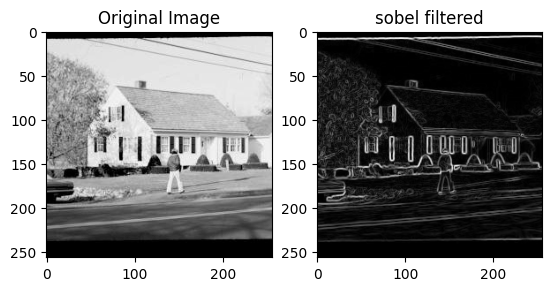

In [71]:
gradient_x = cv2.filter2D(img, cv2.CV_64F, G_x)
gradient_y = cv2.filter2D(img, cv2.CV_64F, G_y)

gradient_magnitude = np.sqrt(np.square(gradient_x) + np.square(gradient_y))
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255

gradient_magnitude = gradient_magnitude.astype(np.uint8)

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(gradient_magnitude, cmap='gray'), plt.title('sobel filtered')





---



# Quetsion#2
Write a function that convolves an image with a given convolution filter function [output_Image]= myImageFilter( Input_image, filter)

function [output_Image]= myImageFilter( Input_image, filter)

Your function should output image of the same size as that of input Image (use padding).
Test your function (on attached images “House1.jpg” and “House2.jpg”) and show
results on the following Kernels.

1- Averaging Kernel (3×3 and 5×5 )

(<Axes: title={'center': 'House1 5x5'}>,
 Text(0.5, 1.0, 'House1 5x5'))

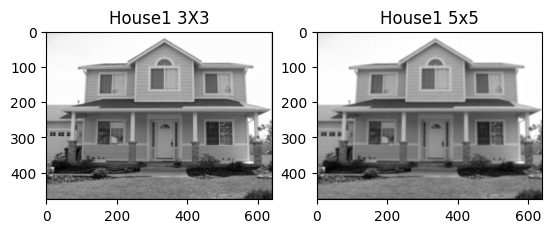

In [83]:
from scipy.signal import convolve2d

def function_1(input_image ,filter):


  filter = np.array(filter)
  filter_height, filter_width = filter.shape
  pad_height = filter_height // 2
  pad_width = filter_width // 2
  padded_image = np.pad(input_image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

  output_image = convolve2d(padded_image, filter, mode='valid', boundary='symm')


  return output_image

house1 = io.imread("House1.jpg")
house2 = io.imread("House2.jpg")

averaging_kernel_3x3 = np.ones((3, 3)) / 9

averaging_kernel_5x5 = np.ones((5, 5)) / 25

output_image_3x3 = function_1(house1, averaging_kernel_3x3)
output_image_5x5 = function_1(house1, averaging_kernel_5x5)

plt.subplot(121), plt.imshow(output_image_3x3, cmap='gray'), plt.title('House1 3X3')
plt.subplot(122), plt.imshow(output_image_5x5, cmap='gray'), plt.title('House1 5x5')










(<Axes: title={'center': 'House2 5x5'}>,
 Text(0.5, 1.0, 'House2 5x5'))

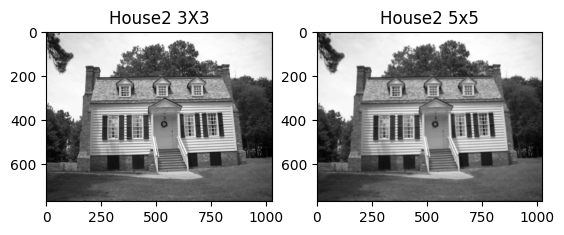

In [84]:
output_image_3x3 = function_1(house2, averaging_kernel_3x3)
output_image_5x5 = function_1(house2, averaging_kernel_5x5)

plt.subplot(121), plt.imshow(output_image_3x3, cmap='gray'), plt.title('House2 3X3')
plt.subplot(122), plt.imshow(output_image_5x5, cmap='gray'), plt.title('House2 5x5')





2- Gaussian Kernel (σ = 1,2,3 ) Use (2σ +1)×(2σ +1) as size of Kernel (You may write
a separate function to generate Gaussian Kernels for different values of σ).

**For house 1 image**

(<Axes: title={'center': 'House1 Sigma 2 '}>,
 Text(0.5, 1.0, 'House1 Sigma 2 '))

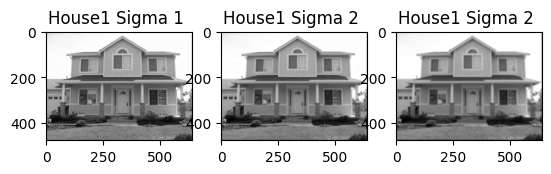

In [89]:
def generate_gaussian_kernel(sigma):
    size = int(2 * sigma + 1)
    kernel = np.fromfunction(
        lambda x, y: (1/(2 * np.pi * sigma ** 2)) * np.exp(-((x - size // 2) ** 2 + (y - size // 2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)


#segma = 1
gaussian_kernel_1 = generate_gaussian_kernel(1)
output_image_segma_1 = function_1(house1, gaussian_kernel_1)

#segma =2
gaussian_kernel_2 = generate_gaussian_kernel(2)
output_image_segma_2 = function_1(house1, gaussian_kernel_2)
#segma = 3
gaussian_kernel_3 = generate_gaussian_kernel(3)
output_image_segma_3 = function_1(house1, gaussian_kernel_3)

plt.subplot(131), plt.imshow(output_image_segma_1, cmap='gray'), plt.title('House1 Sigma 1 ')
plt.subplot(132), plt.imshow(output_image_segma_2, cmap='gray'), plt.title('House1 Sigma 2 ')
plt.subplot(133), plt.imshow(output_image_segma_3, cmap='gray'), plt.title('House1 Sigma 3 ')





**For house2 image**

(<Axes: title={'center': 'House2 Sigma 3 '}>,
 Text(0.5, 1.0, 'House2 Sigma 3 '))

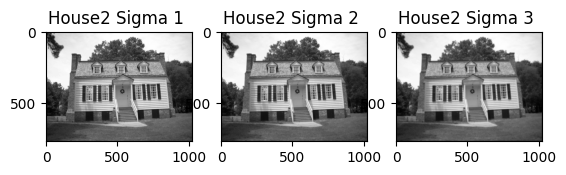

In [91]:


#segma = 1
gaussian_kernel_1 = generate_gaussian_kernel(1)
output_image_segma_1 = function_1(house2, gaussian_kernel_1)

#segma =2
gaussian_kernel_2 = generate_gaussian_kernel(2)
output_image_segma_2 = function_1(house2, gaussian_kernel_2)
#segma = 3
gaussian_kernel_3 = generate_gaussian_kernel(3)
output_image_segma_3 = function_1(house2, gaussian_kernel_3)

plt.subplot(131), plt.imshow(output_image_segma_1, cmap='gray'), plt.title('House2 Sigma 1 ')
plt.subplot(132), plt.imshow(output_image_segma_2, cmap='gray'), plt.title('House2 Sigma 2 ')
plt.subplot(133), plt.imshow(output_image_segma_3, cmap='gray'), plt.title('House2 Sigma 3 ')

the results seems insigneficant but with zooming in , it is noticed that the image blur factor differs

3- Sobel Edge Operators

(<Axes: title={'center': 'House2 sobel'}>,
 Text(0.5, 1.0, 'House2 sobel'))

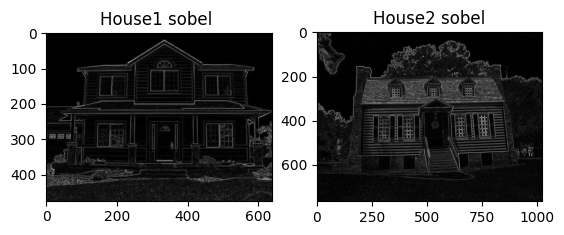

In [94]:
def sobel_function(image_input):
    G_x = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])


    G_y = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

    gradient_x = np.abs(convolve2d(image_input, G_x, mode='valid', boundary='symm'))
    gradient_y = np.abs(convolve2d(image_input, G_y, mode='valid', boundary='symm'))

    edge_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return edge_magnitude

output_image_house1 = sobel_function(house1)

output_image_house2= sobel_function(house2)



plt.subplot(121), plt.imshow(output_image_house1, cmap='gray'), plt.title('House1 sobel ')
plt.subplot(122), plt.imshow(output_image_house2, cmap='gray'), plt.title('House2 sobel')






4- Prewitt Edge Operators:

(<Axes: title={'center': 'House2 prewitt_function'}>,
 Text(0.5, 1.0, 'House2 prewitt_function'))

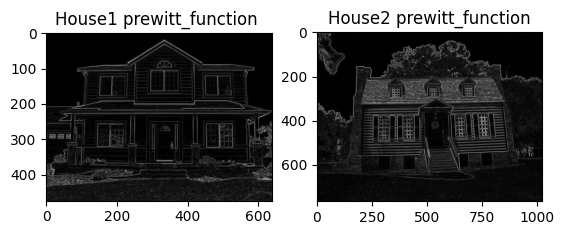

In [98]:
def prewitt_function(input_image):
    G_x = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])


    G_y = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]])

    gradient_x = np.abs(convolve2d(input_image, G_x, mode='valid', boundary='symm'))
    gradient_y = np.abs(convolve2d(input_image, G_y, mode='valid', boundary='symm'))

    edge_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)


    return edge_magnitude


output_house1 = prewitt_function(house1)
output_house2 = prewitt_function(house2)



plt.subplot(121), plt.imshow(output_house1, cmap='gray'), plt.title('House1 prewitt_function ')
plt.subplot(122), plt.imshow(output_house2, cmap='gray'), plt.title('House2 prewitt_function')








there maybe seem to be a problem in G_Y in the 3rd row , based on assignment instructions the row is -1 , -1 , 1 , the prewitt_function will result an images same as the orginal like the below picture , but if the element 1 is changed to -1 , the result will be like the above picture , which is edge detection .

(<Axes: title={'center': 'House2 prewitt_function'}>,
 Text(0.5, 1.0, 'House2 prewitt_function'))

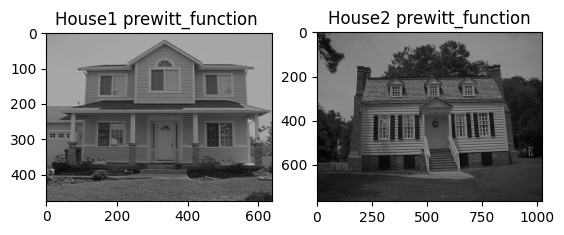

In [99]:
def prewitt_function(input_image):
    G_x = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])


    G_y = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, 1]])

    gradient_x = np.abs(convolve2d(input_image, G_x, mode='valid', boundary='symm'))
    gradient_y = np.abs(convolve2d(input_image, G_y, mode='valid', boundary='symm'))

    edge_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)


    return edge_magnitude


output_house1 = prewitt_function(house1)
output_house2 = prewitt_function(house2)



plt.subplot(121), plt.imshow(output_house1, cmap='gray'), plt.title('House1 prewitt_function ')
plt.subplot(122), plt.imshow(output_house2, cmap='gray'), plt.title('House2 prewitt_function')







---



# Quetsion#3
Attached “Noisyimage1” and “Noisyimage2” are corrupted by salt and paper noise.
Apply 5 by 5 Averaging and Median filter and show your outputs. Why Median filter
works better than averaging filter?

In [ ]:
Noisyimage1 = io.imread("Noisyimage1.jpg")
Noisyimage2 = io.imread("Noisyimage2.jpg")

(<Axes: title={'center': 'Original Noisyimage2'}>,
 Text(0.5, 1.0, 'Original Noisyimage2'))

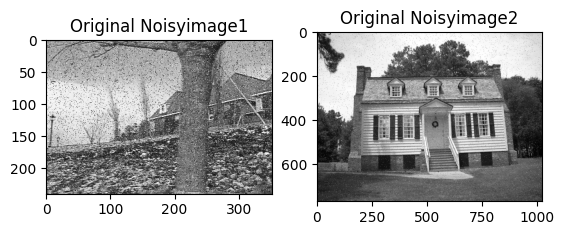

In [ ]:
plt.subplot(121), plt.imshow(Noisyimage1, cmap='gray'), plt.title('Original Noisyimage1')
plt.subplot(122), plt.imshow(Noisyimage2, cmap='gray'), plt.title('Original Noisyimage2')

**Applying 5x5 averaging using OpenCV library with kernal size 5X5**

In [ ]:
averaging_5x5_kernel_size = (5, 5)
averaged5x5_Noisyimage1 = cv2.blur(Noisyimage1, averaging_5x5_kernel_size)
averaged5x5_Noisyimage2 = cv2.blur(Noisyimage2, averaging_5x5_kernel_size)

(<Axes: title={'center': 'averaged Noisyimage2'}>,
 Text(0.5, 1.0, 'averaged Noisyimage2'))

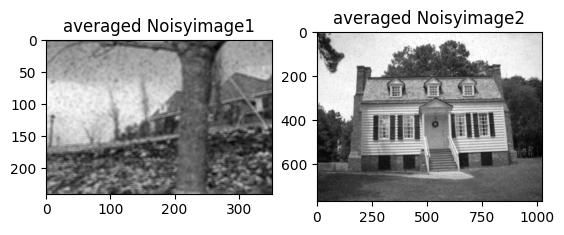

In [ ]:
plt.subplot(121), plt.imshow(averaged5x5_Noisyimage1, cmap='gray'), plt.title('averaged Noisyimage1')
plt.subplot(122), plt.imshow(averaged5x5_Noisyimage2, cmap='gray'), plt.title('averaged Noisyimage2')

By using the averageing filter which blurs or smoths the image , it is noticed that the noisy effects are starting to `fade off `

**Applying  5X5 Median filter**

In [ ]:
medial_kernel_size = 5
median_Noisyimage1 = cv2.medianBlur(Noisyimage1, medial_kernel_size)
median_Noisyimage2 = cv2.medianBlur(Noisyimage2, medial_kernel_size)



(<Axes: title={'center': 'Median Noisyimage2'}>,
 Text(0.5, 1.0, 'Median Noisyimage2'))

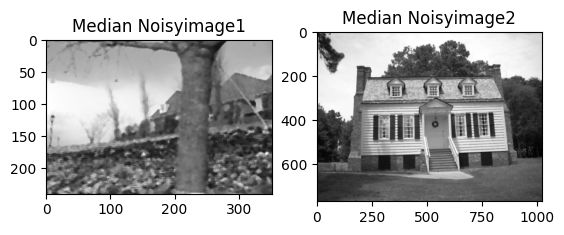

In [ ]:
plt.subplot(121), plt.imshow(median_Noisyimage1, cmap='gray'), plt.title('Median Noisyimage1')
plt.subplot(122), plt.imshow(median_Noisyimage2, cmap='gray'), plt.title('Median Noisyimage2')

Verdict : by comparing each filtering algorthim it is noticed that the Median filter has the upper hand in smothing the pictures from the salt and pepper noise , the reason behind this result stands because the median filtering does not create unrealistic pixels when the filter reaches the edge of the image   


# Quetsion#4
Compute gradient magnitude for attached image “Q4_Image” (using built-in sobel
gradients function).
1. Stretch the resulting magnitude (between 0 to 255) for better visualization


(<Axes: title={'center': 'Original Image Q4'}>,
 Text(0.5, 1.0, 'Original Image Q4'))

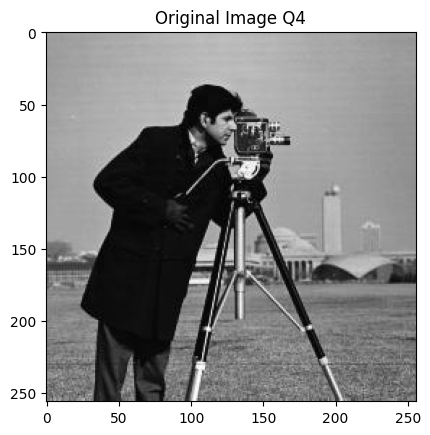

In [ ]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
img_q4 = io.imread("Q_4.jpg")

plt.subplot(111), plt.imshow(img_q4, cmap='gray'), plt.title('Original Image Q4')

(<Axes: title={'center': 'stretched Image Q4'}>,
 Text(0.5, 1.0, 'stretched Image Q4'))

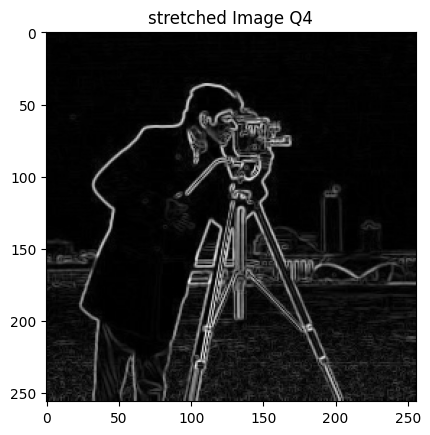

In [ ]:
gradient_x = cv2.Sobel(img_q4, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(img_q4, cv2.CV_64F, 0, 1, ksize=3)

magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

min_magnitude = np.min(magnitude)
max_magnitude = np.max(magnitude)
stretched_magnitude = 255 * (magnitude - min_magnitude) / (max_magnitude - min_magnitude)
stretched_magnitude = stretched_magnitude.astype(np.uint8)

plt.subplot(111), plt.imshow(stretched_magnitude , cmap='gray'), plt.title('stretched Image Q4')



2 -Compute the histogram of gradient magnitude


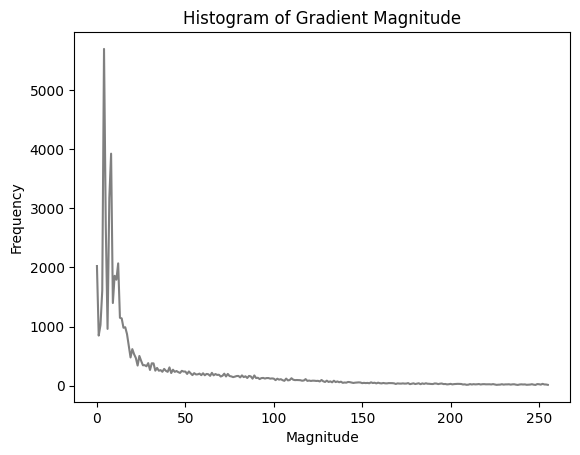

In [ ]:
hist, bins = np.histogram(magnitude.flatten(), bins=256, range=[0, 256])
plt.plot(hist, color='gray')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Gradient Magnitude')
plt.show()

3. Compute gradient orientation (the angle of gradient vector)


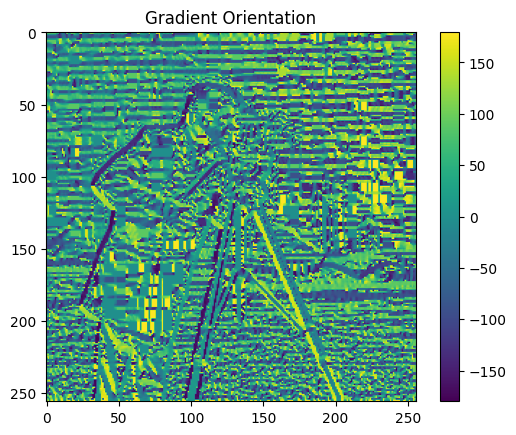

In [ ]:
gradient_orientation = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)
plt.imshow(gradient_orientation, cmap='viridis')
plt.colorbar()
plt.title('Gradient Orientation')
plt.show()

4. Compute histogram of gradient orientation (angle between 0 and 2*pi)

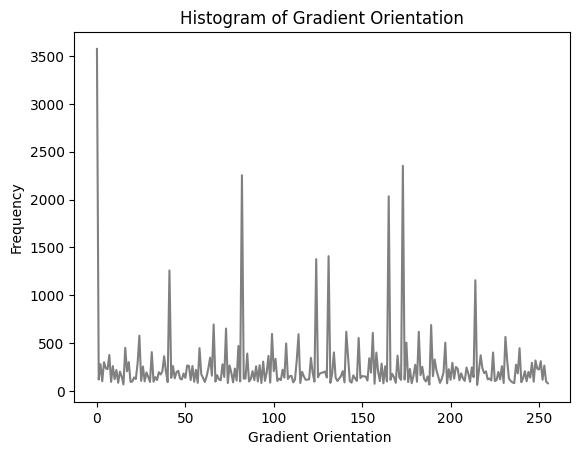

In [ ]:
gradient_orientation = np.mod(gradient_orientation, 2*np.pi)

hist, bins = np.histogram(gradient_orientation.flatten(), bins=256, range=[0, 2*np.pi])


plt.plot(hist, color='gray')
plt.xlabel('Gradient Orientation ')
plt.ylabel('Frequency')
plt.title('Histogram of Gradient Orientation')
plt.show()



---



# Quetsion#5
Load walk_1.jpg and walk_2.jpg images in Python. Convert them to gray scale
and subtract walk_2.jpg from walk_1.jpg. What is the result? Why?

(<Axes: title={'center': 'Walk_2 image gray scaled'}>,
 Text(0.5, 1.0, 'Walk_2 image gray scaled'))

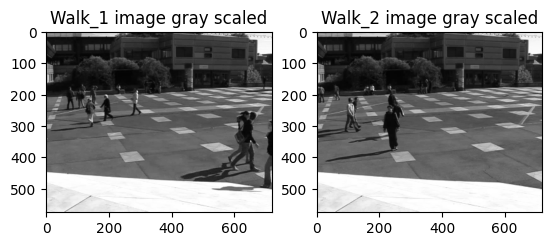

In [ ]:
from skimage import io
from PIL import Image

walk1 = io.imread("walk_1.jpg")
walk2 = io.imread("walk_2.jpg")

walk_1_gray = cv2.cvtColor(walk1, cv2.COLOR_BGR2GRAY)
walk_2_gray = cv2.cvtColor(walk2, cv2.COLOR_BGR2GRAY)

plt.subplot(121), plt.imshow(walk_1_gray , cmap='gray'), plt.title('Walk_1 image gray scaled')
plt.subplot(122), plt.imshow(walk_2_gray , cmap='gray'), plt.title('Walk_2 image gray scaled')



(<Axes: title={'center': 'subtracted gray images '}>,
 Text(0.5, 1.0, 'subtracted gray images '))

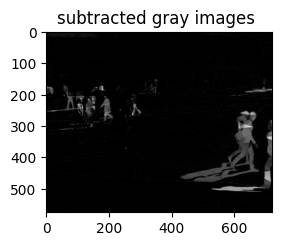

In [ ]:
walk_image_subtracted = cv2.subtract(walk_2_gray, walk_1_gray)


plt.subplot(121), plt.imshow(walk_image_subtracted , cmap='gray'), plt.title('subtracted gray images ')

the results as it appers seems like adding the difference between 2 images and deleting the similarites , this process called  pixel-wise subtraction , this process enhances the difference between the subtracted images .
the subtraction proecess is based on pixles which means the 2 images must have same dimensions to avoid subtracting the differences .



---



# Quetsion 6#
Apply canny edge detector on the “Q_4.jpg” using OpenCV function “Canny”. Test
different values of ‘Threshold’.

(<Axes: title={'center': 'Q4 Image original'}>,
 Text(0.5, 1.0, 'Q4 Image original'))

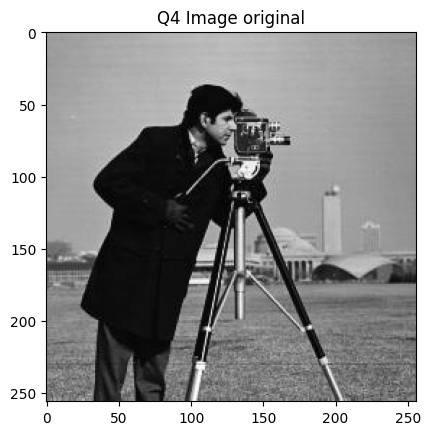

In [ ]:
# using OpenCV library with Canny function
import cv2
plt.subplot(111), plt.imshow(img_q4 , cmap='gray'), plt.title('Q4 Image original')


Step 1 : applying Gassian BLur  to reduce the noise and to improve the canny algorithm performence.

(<Axes: title={'center': 'Q4 Image Gaussian blur'}>,
 Text(0.5, 1.0, 'Q4 Image Gaussian blur'))

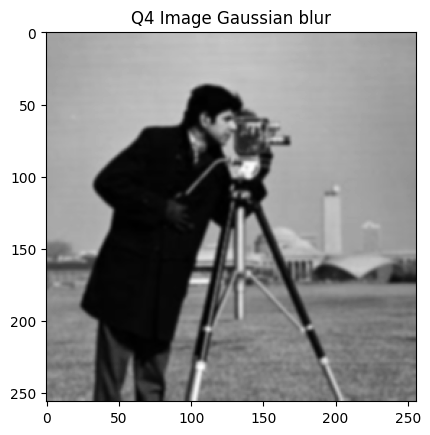

In [ ]:
gaussian_blur =  cv2.GaussianBlur(img_q4, (5, 5), 0) # Gaussian Blur function with Kernal size 5 , 5 ( width , height) with 0  standard deviation
plt.subplot(111), plt.imshow(gaussian_blur , cmap='gray'), plt.title('Q4 Image Gaussian blur')
# after applying Gaussian Blur

Lower Threshold = 50
Upper Threshold = 150

(<Axes: title={'center': 'Q4 Image with canny detection'}>,
 Text(0.5, 1.0, 'Q4 Image with canny detection'))

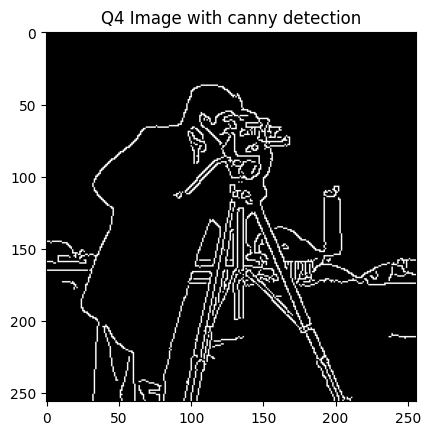

In [ ]:
canny_image =cv2.Canny(gaussian_blur, 50, 150)  # canny fucntion with lower threshold set to 50 and upper threshold set to 150

plt.subplot(111), plt.imshow(canny_image , cmap='gray'), plt.title('Q4 Image with canny detection')


Lower Threshold = 30
Upper Threshold = 100

(<Axes: title={'center': 'Q4 Image with canny detection'}>,
 Text(0.5, 1.0, 'Q4 Image with canny detection'))

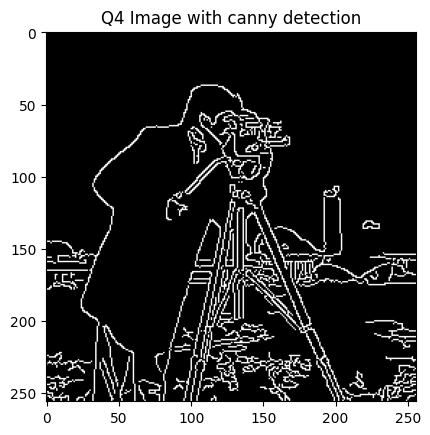

In [ ]:
canny_image =cv2.Canny(gaussian_blur, 30, 100)  # canny fucntion with lower threshold set to 50 and upper threshold set to 150

plt.subplot(111), plt.imshow(canny_image , cmap='gray'), plt.title('Q4 Image with canny detection')


Lower Threshold = 150
Upper Threshold = 300

(<Axes: title={'center': 'Q4 Image with canny detection'}>,
 Text(0.5, 1.0, 'Q4 Image with canny detection'))

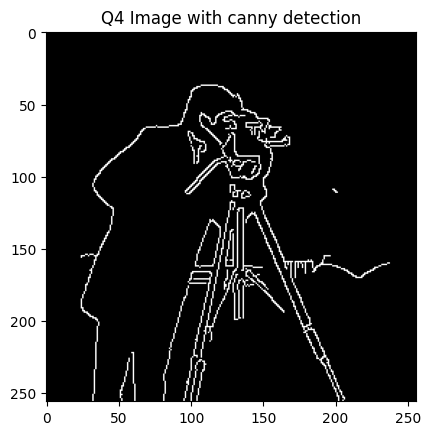

In [ ]:
canny_image =cv2.Canny(gaussian_blur, 150, 300)  # canny fucntion with lower threshold set to 50 and upper threshold set to 150

plt.subplot(111), plt.imshow(canny_image , cmap='gray'), plt.title('Q4 Image with canny detection')


result : the more the threshold is lowered ( high and low ) the more the edges get detected



---
END OF THE ASSIGNMENT
